In [2]:
import tkinter as tk 
from tkinter import simpledialog
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# read file 
inputFileName=None
inputArr = []


window = tk.Tk()
window.withdraw()
inputFileName = simpledialog.askstring(title="input file",prompt="Enter the input file name") 
window.destroy()

try:       
    inputFile = open(inputFileName, "r")
except:      
    print ("Could not open/read file:")
    sys.exit()


for val in inputFile.read().split():
    inputArr.append(float(val))
inputFile.close()
inputArr = np.array(inputArr)
numberOfProcesses=int(inputArr[0])
arrivalTimes=[None] * numberOfProcesses
burstTimes=[None] * numberOfProcesses
priorities=[None] * numberOfProcesses
remainingTimes=[None] * numberOfProcesses
finishTimes=[None] * numberOfProcesses

for i in range(1,inputArr.shape[0],4):
    arrivalTimes[int(inputArr[i]-1)]=(inputArr[i+1])
    burstTimes[int(inputArr[i]-1)]=(inputArr[i+2])
    priorities[int(inputArr[i]-1)]=(inputArr[i+3])
    finishTimes[int(inputArr[i]-1)]=(-1.0)

arrivalTimes=np.array(arrivalTimes)
burstTimes=np.array(burstTimes)
priorities=np.array(priorities)
finishTimes=np.array(finishTimes)



In [25]:
window=None
alg=None
context=0
quantum=1
def HPF():
    global alg,window
    alg="HPF"
    window.destroy()
    
def FCFS():
    global alg,window
    alg="FCFS"
    window.destroy()
    
def RR():
    global alg,window,context,quantum
    alg="RR"
    window.destroy()
    window = tk.Tk()
    window.withdraw()
    context = simpledialog.askstring(
        title="Context Switching",prompt="Enter Context Switching") 
    window.destroy()
    window = tk.Tk()
    window.withdraw()
    quantum = simpledialog.askstring(
        title="Time Quantum",prompt="Enter Time Quantum")
    window.destroy()
    
    
def SRTN():
    global alg,window,context,quantum
    alg="SRTN"
    window.destroy()
    window = tk.Tk()
    window.withdraw()
    context = simpledialog.askstring(
        title="Context Switching",prompt="Enter Context Switching")
    window.destroy()
    window = tk.Tk()
    window.withdraw()
    quantum = simpledialog.askstring(
        title="Time Quantum",prompt="Enter Time Quantum")
    window.destroy()
    
    


window = tk.Tk() 
window.title(' scheduling algorithm') 
HPF_button = tk.Button(window, text='HPF', width=25, command=HPF) 
HPF_button.pack() 
FCFS_button = tk.Button(window, text='FCFS', width=25, command= FCFS) 
FCFS_button.pack() 
RR_button = tk.Button(window, text='RR', width=25, command= RR) 
RR_button.pack() 
SRTN_button = tk.Button(window, text='SRTN', width=25, command= SRTN) 
SRTN_button.pack() 
window.mainloop()






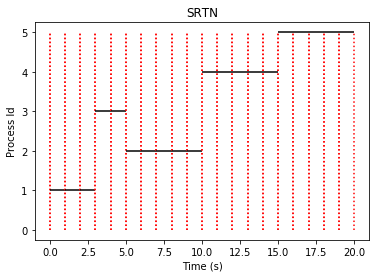

In [26]:
arrivalTimesCopy=np.copy(arrivalTimes)
prioritiesCopy=np.copy(priorities)
remainingTimes=np.copy(burstTimes)


plt.figure()
currentTime=np.min(arrivalTimesCopy)
plt.vlines(0 ,ymin=0,ymax=numberOfProcesses,linestyles='dotted',colors='red')
context=float(context)
quantum=float(quantum)

if (alg=="HPF"):
    while(np.min(arrivalTimesCopy)!=float('inf')):
        currentProcess=np.where(currentTime>=arrivalTimesCopy)[0]
        whoWillWork=np.where(np.max(prioritiesCopy[currentProcess])==prioritiesCopy)[0][0]
        currentTime+=burstTimes[whoWillWork]
        plt.hlines(whoWillWork+1 ,xmin=currentTime-burstTimes[whoWillWork],xmax=currentTime)
        plt.vlines(currentTime ,ymin=0,ymax=numberOfProcesses,linestyles='dotted',colors='red')
        arrivalTimesCopy[whoWillWork]=float('inf')
        prioritiesCopy[whoWillWork]=-1
        remainingTimes[whoWillWork]=0
        finishTimes[whoWillWork]=currentTime
elif (alg=="FCFS"):
    while(np.min(arrivalTimesCopy)!=float('inf')):
        currentProcess=np.where(currentTime>=arrivalTimesCopy)[0]
        whoWillWork=np.where(np.min(arrivalTimesCopy[currentProcess])==arrivalTimesCopy)[0][0]
        currentTime+=burstTimes[whoWillWork]
        plt.hlines(whoWillWork+1 ,xmin=currentTime-burstTimes[whoWillWork],xmax=currentTime)
        plt.vlines(currentTime ,ymin=0,ymax=numberOfProcesses,linestyles='dotted',colors='red')
        arrivalTimesCopy[whoWillWork]=float('inf')
        prioritiesCopy[whoWillWork]=-1
        remainingTimes[whoWillWork]=0
        finishTimes[whoWillWork]=currentTime
elif (alg=="RR"):


    q=[]
    currentProcess=np.where(currentTime>=arrivalTimesCopy)[0]
    np.array([q.append(i) for i in currentProcess])
    while(np.min(arrivalTimesCopy)!=float('inf')):
        
        whoWillWork=q[0]

            
        remainingTimes[whoWillWork]-=quantum

        if remainingTimes[whoWillWork]<=0:
            remainingTimes[whoWillWork]+=quantum
            plt.vlines(currentTime ,ymin=0,ymax=numberOfProcesses,linestyles='dotted',colors='red')
            currentTime+=remainingTimes[whoWillWork]
            plt.hlines(whoWillWork+1 ,xmin=currentTime-remainingTimes[whoWillWork],xmax=currentTime)
            plt.vlines(currentTime ,ymin=0,ymax=numberOfProcesses,linestyles='dotted',colors='red')
            arrivalTimesCopy[whoWillWork]=float('inf')
            prioritiesCopy[whoWillWork]=-1
            remainingTimes[whoWillWork]=0
            currentTime+=context
            finishTimes[whoWillWork]=currentTime
            q.pop(0)
            currentProcess=np.where(currentTime>=arrivalTimesCopy)[0]
            if np.array_equal(np.sort(q),currentProcess)==False:
                newProcess = np.setxor1d(np.sort(q), currentProcess).astype(int)
                np.array([q.append(i) for i in newProcess])
        else:
            plt.vlines(currentTime ,ymin=0,ymax=numberOfProcesses,linestyles='dotted',colors='red')
            currentTime+=quantum
            plt.hlines(whoWillWork+1 ,xmin=currentTime-quantum,xmax=currentTime)
            plt.vlines(currentTime ,ymin=0,ymax=numberOfProcesses,linestyles='dotted',colors='red')
            currentTime+=context
            currentProcess=np.where(currentTime>=arrivalTimesCopy)[0]
            if np.array_equal(np.sort(q),currentProcess)==False:
                newProcess = np.setxor1d(np.sort(q), currentProcess).astype(int)
                np.array([q.append(i) for i in newProcess])
            q.pop(0)
            q.append(whoWillWork)
        
elif (alg=="SRTN"):

    while(np.min(arrivalTimesCopy)!=float('inf')):
        currentProcess=np.where(currentTime>=arrivalTimesCopy)[0]
        whoWillWork=np.where(np.min(remainingTimes[currentProcess])==remainingTimes)[0][0]
        

        remainingTimes[whoWillWork]-=quantum

        if remainingTimes[whoWillWork]<=0:
            remainingTimes[whoWillWork]+=quantum
            plt.vlines(currentTime ,ymin=0,ymax=numberOfProcesses,linestyles='dotted',colors='red')
            currentTime+=remainingTimes[whoWillWork]
            plt.hlines(whoWillWork+1 ,xmin=currentTime-remainingTimes[whoWillWork],xmax=currentTime)
            plt.vlines(currentTime ,ymin=0,ymax=numberOfProcesses,linestyles='dotted',colors='red')
            arrivalTimesCopy[whoWillWork]=float('inf')
            prioritiesCopy[whoWillWork]=-1
            remainingTimes[whoWillWork]=0
            currentTime+=context
            finishTimes[whoWillWork]=currentTime
        else:
            plt.vlines(currentTime ,ymin=0,ymax=numberOfProcesses,linestyles='dotted',colors='red')
            currentTime+=quantum
            plt.hlines(whoWillWork+1 ,xmin=currentTime-quantum,xmax=currentTime)
            plt.vlines(currentTime ,ymin=0,ymax=numberOfProcesses,linestyles='dotted',colors='red')
            currentTime+=context

if (alg!= None):
    turnaroundTimes=finishTimes-arrivalTimes
    waitingTimes=turnaroundTimes-burstTimes
    weightedTurnaroundTimes=turnaroundTimes/burstTimes
    averageTurnaroundTime=np.sum(turnaroundTimes)/numberOfProcesses
    averageWeightedTurnaroundTime=np.sum(weightedTurnaroundTimes)/numberOfProcesses
    #write Output
    outputFile = open("generatedSchedule.txt", "w")
    outputFile.write(alg+'\n')
    for i in range(numberOfProcesses):
        outputFile.write(
            str(i+1)+' '+
            str(waitingTimes[i])+' '+
            str(turnaroundTimes[i])+' '+
            str(weightedTurnaroundTimes[i])+'\n')
    outputFile.write("Average Turnaround time = "+str(averageTurnaroundTime)+'\n')
    outputFile.write("Average Weighted turnaround time = "+str(averageWeightedTurnaroundTime)+'\n')
    outputFile.close()
plt.title(alg)   
plt.xlabel('Time (s)')
plt.ylabel('Process Id')
plt.show()
